In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get The Data

In [85]:
df = pd.read_csv('./data/winequality-red.csv', sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
feature_list = df.columns[:-1].values
label = df.columns[-1]
print(f'Features: {feature_list}\nLabel: {label}')

Features: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: quality


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Frequency distribution by wine quality.

In [ ]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

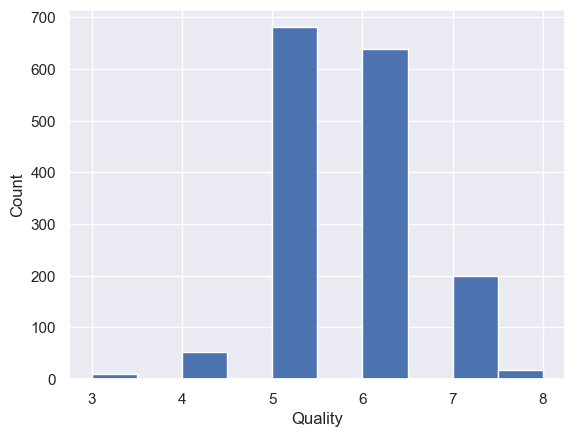

In [ ]:
# set the default aesthetic for plots
sns.set()
df.quality.hist()
plt.xlabel('Quality')
plt.ylabel('Count')

In [ ]:
def split_train_test(data, test_ratio):
    # set the random seed.
    np.random.seed(42)

    # shuffle the dataset.
    shuffled_indices = np.random.permutation(len(data))
    
    # calculate the size of the test set.
    test_set_size = int(len(data) * test_ratio)
    
    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], df.iloc[test_indices]

In [ ]:
split_train_test(df, 0.2)

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 704             9.1             0.765         0.04             1.6      0.078   
 493             8.7             0.690         0.31             3.0      0.086   
 354             6.1             0.210         0.40             1.4      0.066   
 342            10.9             0.390         0.47             1.8      0.118   
 834             8.8             0.685         0.26             1.6      0.088   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

### Random Sampling Using Sklearn
- `train_test_split()` function performs random sampling with
    - **random_state** parameter to set the random seed, which ensures that the
      same data points are selected for test sets across runs.
    - **test_size** parameter for specifying size of the test set.
    - **shuffle flag** to specify if the data needs to be shuffled before splitting.
- Provision for processing multiple datasets with an identical number of rows
  and selecting the same indices from these datasets.
    - Useful when labels are in different dataframe.

In [ ]:
from sklearn.model_selection import train_test_split

We can read the documentation for a function by using the following line of code

In [ ]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### Stratified Sampling
- Data distribution may not be uniform in real world data.
- Random sampling - by its nature - introduces biases in such data sets.
- Recall the label distribution in our dataset: It's not uniform!   
    - Many data points of class 5 and 6 compared to the other classes.
- This causes a problem while random sampling. The test distribution may not
  match with the overall distribution.
<br>

**How do we sample in such cases?**
- We divide the population into homogenous groups called **strata**.
- Data is sampled from each stratum so as to match it with the overall data distribution.
- Scikit-Learn provides a class `StratifiedShuffleSplit` that helps us in stratified sampling.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [ ]:
split.split(df, df["quality"])

<generator object BaseShuffleSplit.split at 0x000001E9CAD830B0>

In [ ]:
for train_index, test_index in split.split(df, df["quality"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

- Let's examine the test set distribution by the wine quality that was used for
stratified sampling.

In [ ]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set) 
strat_dist

quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: count, dtype: float64

In [ ]:
# Now compare this with the overall distribution
overall_dist = df["quality"].value_counts() / len(df)
overall_dist

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [ ]:
# Lets look them side-by-side
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
# Difference between stratified and overall
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
# Percentage difference
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
quality,,,,
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


### Random Sampling

In [ ]:
random_dist = test_set["quality"].value_counts() / len(test_set) 
random_dist

quality
6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: count, dtype: float64

In [ ]:
dist_comparison['random'] = random_dist
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison[['diff(s-o)', 'diff(r-o)']]

,diff(s-o),diff(r-o)
quality,,
5,-0.000891,-0.019641
6,0.001001,0.013501
7,0.000547,0.006797
4,0.001229,-0.001896
8,-0.001882,0.004368
3,-0.000004,-0.003129


# Data Visualization

- It's a good idea to create a copy of the training set so that we can freely
  manipulate it without worrying about any manipulation in the original set.

In [ ]:
exploration_set = strat_train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

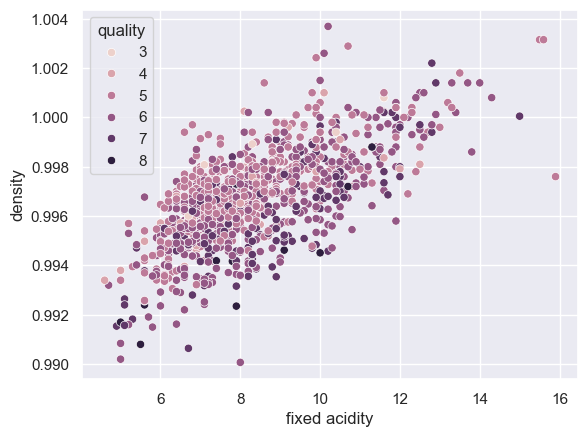

In [ ]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

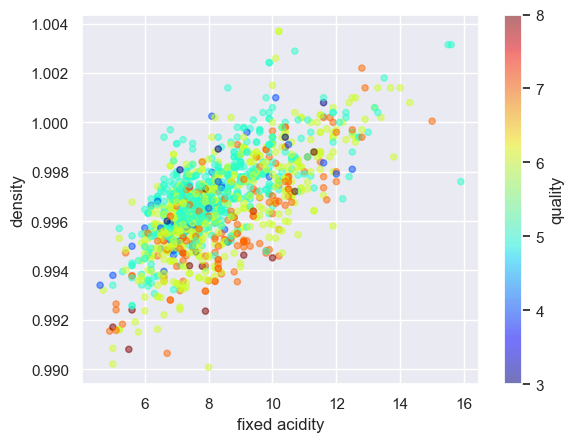

In [ ]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

In [ ]:
# correlations between our features
corr_matrix = exploration_set.corr()
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

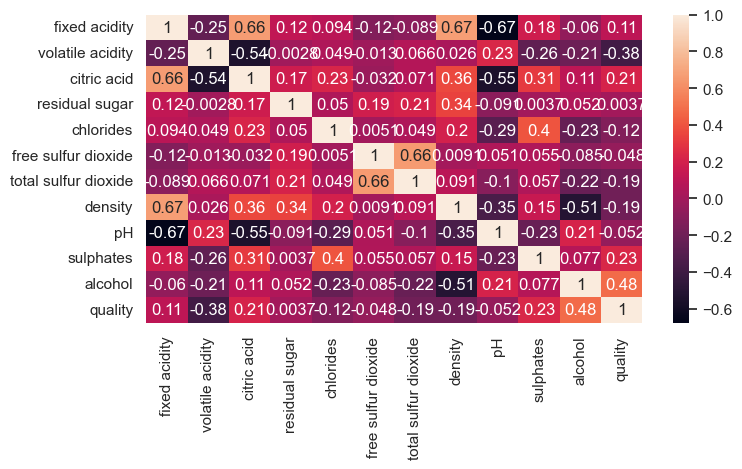

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True)

### Note of wisdom
 1. Visualization and data exploration do NOT have to be **absolutely thorough**.
 2. Objective is to get quick insight into features and its relationship with other features
 and labels.
 3. Exploration is an **iterative process**: Once we build model and obtain more insights,
 we can come back to this step.

# Data Preparation

In [ ]:
# SEPARATE FEATURES AND LABELS FROM TRAINING SET

# Copy all features leaving aside the label.
wine_features = strat_train_set.drop("quality", axis=1)
 
# Copy the label list
wine_labels = strat_train_set['quality'].copy()

In [ ]:
# CHECK IF THERE ARE ANY MISSING VALUES

wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

### Handling Missing Values
- Use **imputation technique** to fill up the missing values.
- **Drop** the rows containing missing values.
- If they do not exists, it is better to keep it as NaN.
- Sklearn provides the following methods to drop rows containing missing values:
    - `dropna()`
    - `drop()`
- It provides `SimpleImputer` class for filling up missing values with. say, median value

In [ ]:
from sklearn.impute import SimpleImputer
# missing value should be replaced by the median value
imputer = SimpleImputer(strategy='median')

imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [ ]:
# Outputs the medians for each column
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [ ]:
# Cross checking the above
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [ ]:
# USING TRAINED IMPUTER TO TRANSFORM

tr_features = imputer.transform(wine_features)
tr_features

array([[ 6.7  ,  0.855,  0.02 , ...,  3.3  ,  0.56 , 10.75 ],
       [ 6.9  ,  0.63 ,  0.33 , ...,  3.22 ,  0.56 ,  9.5  ],
       [11.9  ,  0.57 ,  0.5  , ...,  3.12 ,  0.78 , 10.7  ],
       ...,
       [ 7.8  ,  0.43 ,  0.32 , ...,  3.31 ,  0.64 , 10.3  ],
       [11.2  ,  0.5  ,  0.74 , ...,  3.22 ,  0.62 , 11.2  ],
       [ 8.7  ,  0.42 ,  0.45 , ...,  3.33 ,  0.77 , 12.   ]])

In [ ]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns, index=wine_features.index)
wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


### Handling Text and Categorical Data

##### Converting Categories to Numbers
- Call `fit_transform()` method on ordinal_encoder object to convert text to numbers.
- The list of categories can be obtained via `categories_` instance variable.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

##### Using One Hot Encoding
- Here we create one **binary feature per category** - the feature value is 1 when the category is present else it is 0.
- Only **one feature is 1 (hot) and the rest are 0 (cold)**.
- The new features are referred to as **dummy features**.
- Scikit-Learn provides a `OneHotEncoder` class to convert categorical values
  into one-hot vectors.
- We need to call `fit_transform()` method on `OneHotEncoder` object.
- The output is a SciPy sparse matrix rather than NumPy array

**Problems and Solution:**
- Number of categories are very large, the one-hot encoding would result in a very large number of features.
- Solution(s):
  - **Replace** with categorical numerical features
  - **Convert** into low-dimensional learnable vectors called **embeddings**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

### Feature Scaling
- Most ML algorithms do not perform well when input features are on very
 different scales.
- Scaling of target label is generally not required.

##### Min-max scaling or Normalization
- We subtract minimum value of a feature from the current value and divide it by
  the difference between the minimum and the maximum value of that feature.
- Values are shifted and scaled so that they **range between 0 and 1**.
- Scikit-Learn provides `MinMaxScalar` transformer for this.
- One can specify hyperparameter `feature_range` to specify the range of the
  feature.


##### Standardization
- We subtract mean value of each feature from the current value and divide it by
  the standard deviation so that the **resulting feature has a unit variance**.
- Standardization **does not bound values** to a specific range.
- Standardization is **less affected by the outliers** compared to the normalization.
- Scikit-Learn provides `StandardScalar` transformation for feature standardization.
- Note that all these **transformers are learnt on the training data** and then
  applied on the training and test data to transform them.
- **Never learn these transformers on the full dataset**.

### Transformation Pipeline
- Scikit-Learn provides a Pipeline class to **line up transformations in an intended order**
- Let's understand what is happening here:
    - Pipeline has a sequence of transformations - missing value imputation
      followed by standardization.
    - Each step in the sequence is defined by **name, estimator** pair.
      - `'imputer'` is the **name**
      - `SimpleImputer(strategy="median")` is the **estimator**
    - Each name should be unique and should not contain __ (double underscore).
- The pipeline exposes the same method as the final estimator.
  - Here `StandardScalar` is the last estimator and since it is a transformer, we
    call `fit_transform()` method on the `Pipeline` object.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
                            ('imputer', SimpleImputer(strategy="median")),
                            ('std_scaler', StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

### How to Transform Mixed Features?
- The real world data has **both categorical as well as numerical features** and we
need to apply different transformations to them.
- Scikit-Learn introduced `ColumnTransformer` for this purpose.

**Example**
```python
from sklearn.compose import ColumnTransformer
num_attribs = list(wine_features) # feature names
 cat_attribs = ["place_of_manufacturing"]
 full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
 wine_features_tr = full_pipeline.fit_transform(wine_features)
```

- Here we apply `num_pipeline` on numerical features and `OneHotEncoder`
  transformation on the categorical features.
- The `ColumnTransformer` applies each transformation to the appropriate columns
  and then concatenates the outputs along the columns.
- Note that all transformers must return the same number of rows.
- The numeric transformers return dense matrix while the categorical ones return
  sparse matrix.
- The `ColumnTransformer` automatically determines the type of the output based on the density of the resulting matrix.

# Select and Train ML Model
- It's a good practice to **build a quick baseline model** on the preprocessed data
  and get an idea about model performance.

In [ ]:
# USING LINEAR REGRESSION MODEL AS THE BASE LINE

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# wine_features_tr is transformed training set
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [ ]:
# USING MSE TO EVALUATE PERFORMANCE ON TRAINING SET
from sklearn.metrics import mean_squared_error
quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

In [ ]:
# EVALUATING PERFORMANCE ON TEST SET

# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.39759130875015186

Text(0, 0.5, 'Predicted quality')

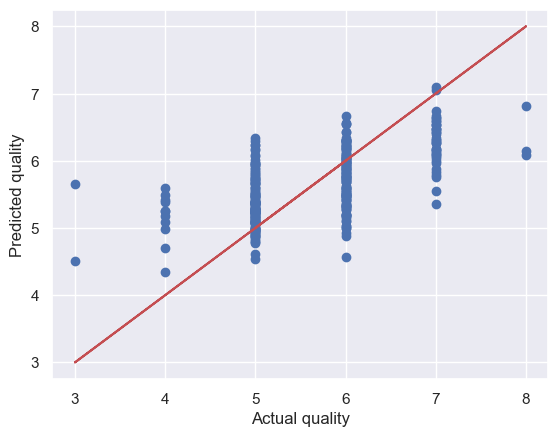

In [86]:
# VISUALIZING ERROR

plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [87]:
# NOW USING DecisionTreeRegressor MODEL

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [88]:
# GETTING THE TRAINING ERROR
quality_predictions =  tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [89]:
# ERROR ON TESTING DATA
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.58125

##### Using Cross Validation
- Cross validation **provides a separate MSE for each validation set**, which we can
  use to get a mean estimation of MSE as well as the standard deviation, which helps us to determine how precise is the estimate.
- The additional cost we pay in cross validation is additional training runs,
  which may be too expensive in certain cases.

In [90]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [91]:
# LINEAR REGRESSION CV

scores = cross_val_score(
    estimator=lin_reg,
    X=wine_features_tr,
    y=wine_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.4316392172121959
Standard deviation: 0.08356359730413965


In [92]:
# DECISION TREE CV

scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
Mean: 0.6852177657480315
Standard deviation: 0.16668343331737054


### Random Forest CV
- Random forest model builds multiple decision trees on randomly selected features
and then average their predictions.
- Building a model on top of other model is called **ensemble learning**, which is
often used to improve performance of ML models.

In [93]:
from sklearn.ensemble import RandomForestRegressor
 
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,
                        scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]
Mean: 0.34565226131889765
Standard deviation: 0.0736322184302973


In [94]:
# EVALUATING MODEL
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.34449875

Text(0, 0.5, 'Predicted quality')

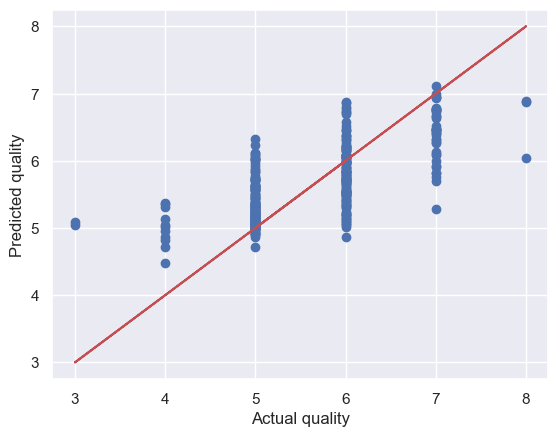

In [95]:
# PLOTTING ERROR
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

##### NOTE
- Random forest looks more promising than the other two models.
- It's a good practice to build a few such models quickly without tuning their
  hyperparameters and **shortlist a few promising models** among them.
- Also save the models to the disk in **Python pickle format**.

# Finetune Your Model
- Tuning these hyperparameters lead to better accuracy of ML models.

##### Grid Search CV
- We need to specify a **list of hyperparameters** along with the range of values to try.
- It **automatically evaluates all possible combinations** of hyperparameter values
  using cross-validation.
- For example, there are number of **hyperparameters** in `RandomForest` regression such as:
    - Number of estimators (`n_estimators`)
    - Maximum number of features (`max_features`)

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Total 12 combinations
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Total 6 combinations
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
# Total number of combinations evaluated  by parameter grid search = 12 + 6 = 18

- `cv=5` i.e. using 5 fold cross validation for training the model.
- We need to train the model for 18 parameter combinations and each combination
  would be trained 5 times as we are using cross-validation here.
- The **total model training runs = 18×5=90**

In [97]:
# CREATING GRID SEARCH CV OBJECT

grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv=5, 
    scoring='neg_mean_squared_error',
    return_train_score=True)

In [98]:
# LAUNCH HYPERPARAMETER SEARCH
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
# OBTAINING BEST PARAMETER
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [100]:
# FINDING ERROR FOR DIFFERENT PARAMETER SETTINGS
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
  print(-mean_score, params)

0.5096674155773421 {'max_features': 2, 'n_estimators': 3}
0.38494794730392157 {'max_features': 2, 'n_estimators': 10}
0.35890284926470584 {'max_features': 2, 'n_estimators': 30}
0.4765907543572984 {'max_features': 4, 'n_estimators': 3}
0.37949047181372547 {'max_features': 4, 'n_estimators': 10}
0.3677285709422658 {'max_features': 4, 'n_estimators': 30}
0.47674223856209147 {'max_features': 6, 'n_estimators': 3}
0.39086173406862745 {'max_features': 6, 'n_estimators': 10}
0.35285364923747276 {'max_features': 6, 'n_estimators': 30}
0.47786049836601296 {'max_features': 8, 'n_estimators': 3}
0.37944690563725486 {'max_features': 8, 'n_estimators': 10}
0.35524742306644874 {'max_features': 8, 'n_estimators': 30}
0.4390253948801742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3897452818627451 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4490985838779956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3858988664215686 {'bootstrap': False, 'max_feature

In [101]:
# GET THE BEST ESTIMATOR
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

**Note**: `GridSearchCV` is initialized with `refit=True` option, which retrains the
best estimator on the full training set.

### Randomized Search
- When we have a **large hyperparameter space**, it is desirable to try `RandomizedSearchCV`.
- It selects a random value for each hyperparameter at the start of each
  iteration and repeats the process for the given number of random combinations.
```python
from sklearn.model_selection import RandomizedSearchCV
```

# Analysis of best model and its errors

In [102]:
# OBTAIN FEATURE IMPORTANCE LEARNT BY THE MODEL
feature_importances = grid_search.best_estimator_.feature_importances_

# we may drop features that are not so important
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.24867116536102707, 'alcohol'),
 (0.1416364273940636, 'sulphates'),
 (0.1266556963936701, 'volatile acidity'),
 (0.0804527251831923, 'total sulfur dioxide'),
 (0.07275072016325314, 'density'),
 (0.058225542967296186, 'citric acid'),
 (0.05791188978825247, 'chlorides'),
 (0.05712441669365611, 'pH'),
 (0.05641645467144794, 'residual sugar'),
 (0.05388861091468476, 'fixed acidity'),
 (0.046266350469456416, 'free sulfur dioxide')]

# Evaluation on Test Set

In [103]:
# TRANSFORM THE TEST FEATURES

# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)
# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [104]:
# PREDICT AND GET FIND THE MSE

# Predicting labels
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

# Finding Error
mean_squared_error(wine_labels_test, quality_test_predictions)

0.35345138888888883

In [106]:
# IT'S A GOOD IDEA TO GET 95% CONFIDENCE INTERVAL OF THE EVALUATION METRIC

from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
                loc=squared_errors.mean(),
                scale=stats.sem(squared_errors))

(0.2915927656958191, 0.41531001208195856)

# ADDITIONAL PROGRAMMING NOTES

In [ ]:
i = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
})
i

,a,b
0,1,10
1,2,20
2,3,30


In [ ]:
i.drop('a', axis=1)

,b
0,10
1,20
2,30


In [ ]:
i

,a,b
0,1,10
1,2,20
2,3,30
